<a href="https://colab.research.google.com/github/niest-pc/Ejercicios-Ciencia_de_Datos/blob/main/02_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión
Capítulo 2 del libro **The Data Science Workshop.** *Second Edition* (2020). Packt Publishing.

Este capítulo introduce el tema del análisis de regresión lineal con Python.
- Se aprenden fundamentos del análisis de regresión lineal, incluyendo las ideas detrás del método de mínimos cuadrados.
- Se explora cómo crear gráficos de dispersión de datos bivariados y cómo ajustar una línea de mejor ajuste a través de ellos.
- Se explora cómo usar el módulo _statsmodel_ para definir modelos de regresión lineal simples y resolver el modelo para los parámetros relevantes.
- Se aprende a realizar análisis donde el número de variables independientes es mayor que una utilizando regresiones lineales múltiples.
- Se utilizan enfoques para transformar una relación no lineal entre una variable dependiente y una independiente, de modo que un problema no lineal pueda abordarse mediante regresión lineal.
- Se analiza el estadístico R-cuadrado como medida del ajuste de los modelos de regresión.

Para el análisis realizado en este capítulo se utiliza el conjunto de datos ***Boston Housing***.

## Realización de análisis de regresión con Python

In [ ]:
# importando librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

### Ejercicio 2.01: Carga y preparación de datos para el análisis
En este ejercicio se cargan el conjunto de datos necesarios para el análisis, y se preparan los datos para el análisis.



In [ ]:
# Cargando los datos
BostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/'\
                            'The-Data-Science-Workshop/master/Chapter02/'\
                            'Dataset/Boston.csv')

# Inspeccionando las primeras filas del archivo
BostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
# Encontrando y eliminando los valores faltantes
BostonData = BostonData.dropna()

# Revisando si hay elementos duplicandos y eliminandolos
BostonData = BostonData.drop_duplicates()

# Revisando los nombres de las columnas del archivo
list(BostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [ ]:
# Cambiando el nombre de las columnas del DataFrame por un nombre que tenga significado
renamedBostonData = BostonData.rename(columns = {'CRIM':'tasaDelincuenciaPerCapita',
                                                 ' ZN ':'tierraSobre25K_sqft',
                                                 'INDUS ':'proporciónTerrenosNoMinoristas',
                                                 'CHAS':'rioDummy',
                                                 'NOX':'oxidoNitrico_pp10m',
                                                 'RM':'promedioHabitacionesPorVivienda',
                                                 'AGE':'proporcionViviendasOcupadasPorPropietarios',
                                                 'DIS':'distanciasPonderadas',
                                                 'RAD':'accesibilidadACarreteras',
                                                 'TAX':'tasaImpuestoPredialDeValorTotal_per10K',
                                                 'PTRATIO':'proporciónAlumnoProfesor',
                                                 'LSTAT':'porcentajePoblaciónDeEstatusInferior',
                                                 'MEDV':'valorMedioDeViviendasOcupadasPorPropietarios_Ks'})

# Mostrando las primera filas con los nuevos nombres de las columnas
renamedBostonData.head()

,tasaDelincuenciaPerCapita,tierraSobre25K_sqft,proporciónTerrenosNoMinoristas,rioDummy,oxidoNitrico_pp10m,promedioHabitacionesPorVivienda,proporcionViviendasOcupadasPorPropietarios,distanciasPonderadas,accesibilidadACarreteras,tasaImpuestoPredialDeValorTotal_per10K,proporciónAlumnoProfesor,porcentajePoblaciónDeEstatusInferior,valorMedioDeViviendasOcupadasPorPropietarios_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
# Inspeccionando el tipo de datos de cada columna
renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   tasaDelincuenciaPerCapita                        506 non-null    float64
 1   tierraSobre25K_sqft                              506 non-null    float64
 2   proporciónTerrenosNoMinoristas                   506 non-null    float64
 3   rioDummy                                         506 non-null    int64  
 4   oxidoNitrico_pp10m                               506 non-null    float64
 5   promedioHabitacionesPorVivienda                  506 non-null    float64
 6   proporcionViviendasOcupadasPorPropietarios       506 non-null    float64
 7   distanciasPonderadas                             506 non-null    float64
 8   accesibilidadACarreteras                         506 non-null    int64  
 9   tasaImpuestoPredialDeValorTotal_

In [ ]:
# Calculando estadísticas básicas para las columnas en el DataFrame
BostonData.describe().T # La T se utiliza para transponer los datos
                        # Si es necesario se utiliza "include=[np.number]" para
                        # obtener estadisticas solo de las columnas con números

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
# Dividiendo el DataFrame en conjuntos de entrenamiento y prueba.
x = renamedBostonData.drop('tasaDelincuenciaPerCapita', axis = 1) # "axis = 1": columnas
y = renamedBostonData[['tasaDelincuenciaPerCapita']]

# Estableciendo valor de semilla
seed = 10

# Elegiendo un tamaño de datos de prueba del 30%
tamanho_datos_prueba = 0.3

# Obteniendo los datos de entrenamiento y prueba
entrenamientox, pruebax, entrenamientoy, pruebay = train_test_split(x, y,
                                                                    test_size = tamanho_datos_prueba,
                                                                    random_state = seed)

# Subconjuntos con los datos de entrenamiento y prueba
datos_entrenamiento = pd.concat([entrenamientox, entrenamientoy], axis = 1)
datos_prueba = pd.concat([pruebax, pruebay], axis = 1)

# Calculando la matriz de correlación para los datos de entrenamiento
matriz_correlacion = datos_entrenamiento.corr(method = 'pearson')
matriz_correlacion

,tierraSobre25K_sqft,proporciónTerrenosNoMinoristas,rioDummy,oxidoNitrico_pp10m,promedioHabitacionesPorVivienda,proporcionViviendasOcupadasPorPropietarios,distanciasPonderadas,accesibilidadACarreteras,tasaImpuestoPredialDeValorTotal_per10K,proporciónAlumnoProfesor,porcentajePoblaciónDeEstatusInferior,valorMedioDeViviendasOcupadasPorPropietarios_Ks,tasaDelincuenciaPerCapita
tierraSobre25K_sqft,1.000000,-0.540095,-0.059189,-0.520305,0.355346,-0.577457,0.659340,-0.311920,-0.324172,-0.424612,-0.435827,0.422574,-0.198455
proporciónTerrenosNoMinoristas,-0.540095,1.000000,0.065271,0.758178,-0.399166,0.667887,-0.728968,0.580813,0.702973,0.398513,0.607457,-0.508338,0.387471
rioDummy,-0.059189,0.065271,1.000000,0.091469,0.107996,0.106329,-0.098551,0.022731,-0.007864,-0.094255,-0.041110,0.136831,-0.044587
oxidoNitrico_pp10m,-0.520305,0.758178,0.091469,1.000000,-0.306510,0.742016,-0.776311,0.606721,0.662164,0.206809,0.603656,-0.453424,0.405813
promedioHabitacionesPorVivienda,0.355346,-0.399166,0.107996,-0.306510,1.000000,-0.263085,0.215439,-0.183000,-0.280341,-0.350828,-0.586573,0.666761,-0.167258
proporcionViviendasOcupadasPorPropietarios,-0.577457,0.667887,0.106329,0.742016,-0.263085,1.000000,-0.751059,0.458717,0.515376,0.289976,0.639881,-0.419062,0.355730
distanciasPonderadas,0.659340,-0.728968,-0.098551,-0.776311,0.215439,-0.751059,1.000000,-0.494932,-0.543333,-0.259140,-0.522120,0.289658,-0.378997
accesibilidadACarreteras,-0.311920,0.580813,0.022731,0.606721,-0.183000,0.458717,-0.494932,1.000000,0.908578,0.462290,0.456592,-0.383132,0.608838
tasaImpuestoPredialDeValorTotal_per10K,-0.324172,0.702973,-0.007864,0.662164,-0.280341,0.515376,-0.543333,0.908578,1.000000,0.462556,0.528029,-0.478903,0.565035
proporciónAlumnoProfesor,-0.424612,0.398513,-0.094255,0.206809,-0.350828,0.289976,-0.259140,0.462290,0.462556,1.000000,0.374842,-0.503692,0.276530


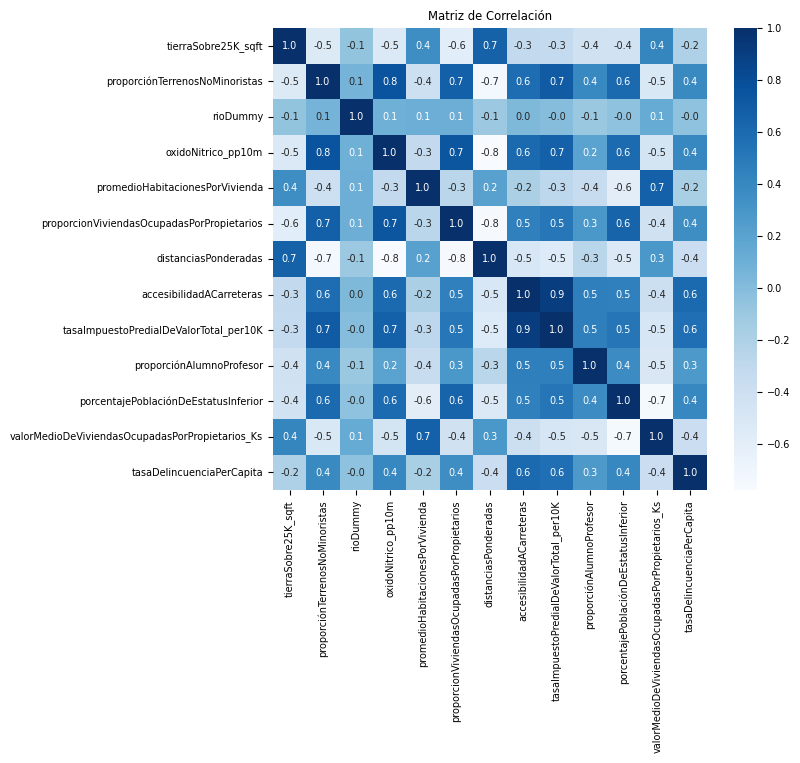

In [ ]:
# Graficando matriz de correlación para los datos de entrenamiento
plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(7, 6))  # Ajusta el tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap="Blues", fmt=".1f")
plt.title("Matriz de Correlación")
plt.show()

### Ejercicio 2.02: Investigación gráfica de relaciones lineales con Python
Los gráficos de dispersión con una línea de regresión permiten a un científico de datos visualizar rápidamente una posible correlación entre una variable dependiente y una independiente.
El objetivo de este ejercicio es utilizar esta técnica para investigar cualquier relación lineal que pueda existir entre la tasa de delincuencia per cápita y el valor medio de las viviendas ocupadas por sus propietarios en los pueblos de Boston.

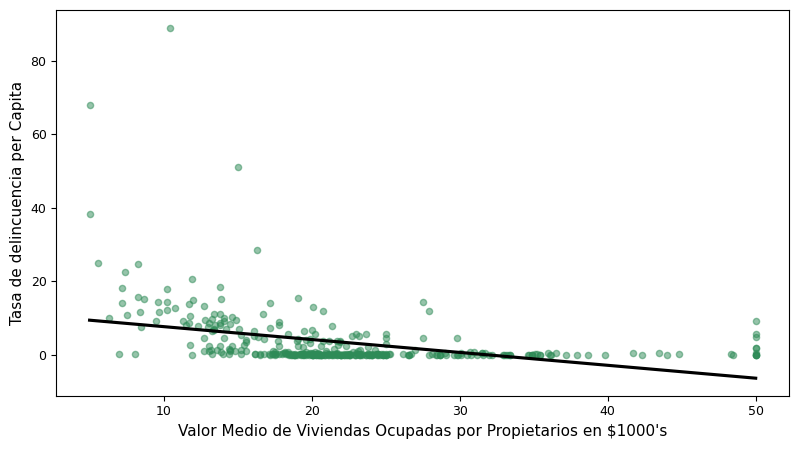

In [ ]:
# Usando la función subplots de matplotlib para definir un lienzo (con la variable fig)
# y un objeto gráfico (con la variable ax)
fig, ax = plt.subplots(figsize=(8, 4.5))

# Usando seaborn regplot para crear el diagrama de dispersión
sns.regplot(x = "valorMedioDeViviendasOcupadasPorPropietarios_Ks",
            y = "tasaDelincuenciaPerCapita", ci = None,
            data = datos_entrenamiento, color = 'k', ax = ax,
            scatter_kws = {"s": 20, "color": "seagreen", "alpha":0.5})

# Configurando las etiquetas 'x' y 'y', el tamaño de fuente y el nombre de las etiquetas
ax.set_ylabel('Tasa de delincuencia per Capita', fontsize = 11)
ax.set_xlabel("Valor Medio de Viviendas Ocupadas por Propietarios en $1000's",
              fontsize = 11)

# Límites 'x' y 'y', y los parámetros de marca del objeto gráfico de matplotlib (ax).
ax.set_xlim(left = None, right = None)
ax.set_ylim(bottom = None, top = None)
ax.tick_params(labelsize = 9)

# Configurando el diseño del lienzo como "tight".
fig.tight_layout()

### Ejercicio 2.03: Examinando una posible relación logarítmica-lineal con Python
En este ejercicio se utiliza la función logarítmica para transformar variables y averiguar si esto ayuda a ajustar mejor la línea de regresión a los datos.
También se usan intervalos de confianza incluyendo un intervalo de confianza del 95 % de los coeficientes de regresión en la gráfica.

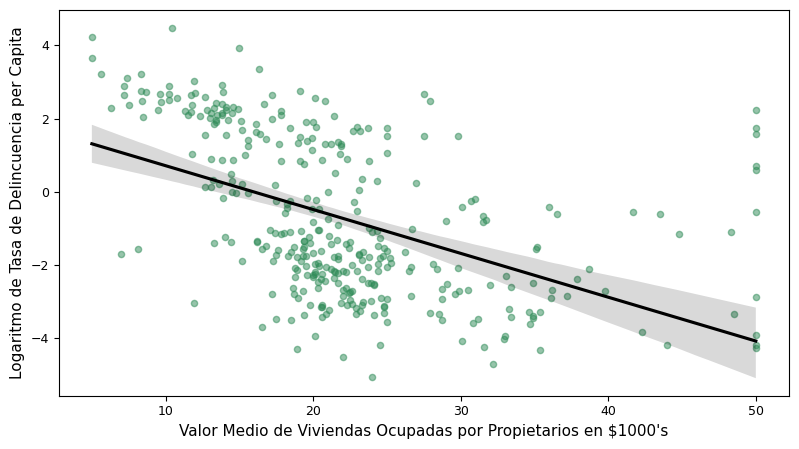

In [ ]:
# Usando la función subplotspara definir un lienzo y un objeto gráfico
fig, ax = plt.subplots(figsize=(8, 4.5))

# Usando la función logaritmo en NumPy para transformar la variable dependiente
log_y = np.log(datos_entrenamiento['tasaDelincuenciaPerCapita'])

# Usando regplot de Seaborn para crear el diagrama de dispersión.
# Establecindo el argumento del intervalo de confianza en 95%.
sns.regplot(x = 'valorMedioDeViviendasOcupadasPorPropietarios_Ks', y = log_y,
            ci = 95, data = datos_entrenamiento, ax = ax, color = 'k',
            scatter_kws = {"s": 20, "color": "seagreen", "alpha": 0.5})

# Configurando las etiquetas 'x' y 'y', el tamaño de fuente y el nombre de las etiquetas
ax.set_ylabel('Logaritmo de Tasa de Delincuencia per Capita', fontsize = 11)
ax.set_xlabel("Valor Medio de Viviendas Ocupadas por Propietarios en $1000's",
              fontsize = 11)

# Límites 'x' y 'y', y los parámetros de marca del objeto gráfico de matplotlib (ax).
ax.set_xlim(left = None, right = None)
ax.set_ylim(bottom = None, top = None)
ax.tick_params(labelsize = 9)

# Configurando el diseño del lienzo como "tight".
fig.tight_layout()

### Ejercicio 2.04: Ajuste de un modelo de regresión lineal simple con la API de fórmulas de Statsmodels
En este ejercicio se examina un modelo de regresión lineal simple donde la tasa de criminalidad per cápita es la variable dependiente y el valor medio de las viviendas ocupadas por sus propietarios es la variable independiente. Se utiliza la API de fórmulas de Statsmodels para crear un modelo de regresión lineal que Python pueda analizar.

In [ ]:
# Definiendo un modelo de regresión lineal
modelo_lineal = smf.ols(formula = 'tasaDelincuenciaPerCapita ~ valorMedioDeViviendasOcupadasPorPropietarios_Ks',
                        data = datos_entrenamiento)

# Llamando al método .fit de la instancia del modelo
resultado_modelo = modelo_lineal.fit()

# Mostrando el resumen del modelo
print(resultado_modelo.summary())

                                OLS Regression Results                               
Dep. Variable:     tasaDelincuenciaPerCapita   R-squared:                       0.144
Model:                                   OLS   Adj. R-squared:                  0.141
Method:                        Least Squares   F-statistic:                     59.02
Date:                       Sun, 10 Aug 2025   Prob (F-statistic):           1.56e-13
Time:                               00:52:04   Log-Likelihood:                -1217.4
No. Observations:                        354   AIC:                             2439.
Df Residuals:                            352   BIC:                             2447.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### Actividad 2.01: Ajuste de un modelo log-lineal con la API de fórmulas de Statsmodels
En esta actividad se realiza un ajuste de modelo log-lineal. El modelo representa la relación entre la variable dependiente transformada en logaritmo (logaritmo de la tasa de delincuencia per cápita) y el valor medio de las viviendas ocupadas por sus propietarios.

In [ ]:
# Definiendo un modelo de regresión lineal
modelo_log_lineal = smf.ols(formula = 'np.log(tasaDelincuenciaPerCapita) ~ valorMedioDeViviendasOcupadasPorPropietarios_Ks',
                        data = datos_entrenamiento)

# Llamando al método .fit de la instancia del modelo
resultado_modelo = modelo_log_lineal.fit()

# Mostrando el resumen del modelo
print(resultado_modelo.summary())

                                    OLS Regression Results                                   
Dep. Variable:     np.log(tasaDelincuenciaPerCapita)   R-squared:                       0.238
Model:                                           OLS   Adj. R-squared:                  0.236
Method:                                Least Squares   F-statistic:                     109.9
Date:                               Sun, 10 Aug 2025   Prob (F-statistic):           1.48e-22
Time:                                       00:52:04   Log-Likelihood:                -727.67
No. Observations:                                354   AIC:                             1459.
Df Residuals:                                    352   BIC:                             1467.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                                      coef  

## Análisis de regresión múltiple

### Ejercicio 2.05: Ajuste de un modelo de regresión lineal múltiple con la API de fórmulas de Statsmodels
En este ejercicio se utiliza el operador más (+) en la cadena de fórmula de Patsy para definir un modelo de regresión lineal que incluya más de una variable independiente.

In [ ]:
# Usando el operador más (+) para definir un modelo lineal multiple
modelo_linealMultiple = smf.ols(formula = 'tasaDelincuenciaPerCapita ~ '\
                                'porcentajePoblaciónDeEstatusInferior'\
                                '+ accesibilidadACarreteras + '\
                                'valorMedioDeViviendasOcupadasPorPropietarios_Ks'\
                                ' + oxidoNitrico_pp10m',
                                data = datos_entrenamiento)

# Llamando al método .fit de la instancia del modelo
resultado_modeloLM = modelo_linealMultiple.fit()

# Mostrando el resumen del modelo
print(resultado_modeloLM.summary())

                                OLS Regression Results                               
Dep. Variable:     tasaDelincuenciaPerCapita   R-squared:                       0.398
Model:                                   OLS   Adj. R-squared:                  0.391
Method:                        Least Squares   F-statistic:                     57.77
Date:                       Sun, 10 Aug 2025   Prob (F-statistic):           2.19e-37
Time:                               00:52:04   Log-Likelihood:                -1154.9
No. Observations:                        354   AIC:                             2320.
Df Residuals:                            349   BIC:                             2339.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### Actividad 2.02: Ajuste de un modelo de regresión log-lineal múltiple
El modelo de regresión log-lineal desarrollado anteriormente pudo explicar aproximadamente el 24 % de la variabilidad en la variable transformada de la tasa de delincuencia per cápita. Ahora se desarrolla un modelo de regresión log-lineal múltiple que explica más del 80% de la variabilidad en la variable dependiente transformada, para esto se utilizan variables independientes del conjunto de datos de Boston Housing con un coeficiente de correlación de 0.4 o más.



In [ ]:
# Definiendo un modelo de regresion log-lineal multiple
modelo_log_lineal_Multiple = smf.ols(formula = 'np.log(tasaDelincuenciaPerCapita) ~ '\
                                '(porcentajePoblaciónDeEstatusInferior'\
                                '+ accesibilidadACarreteras + '\
                                'valorMedioDeViviendasOcupadasPorPropietarios_Ks'\
                                ' + oxidoNitrico_pp10m)**2',
                                data = datos_entrenamiento)

# Llamando al método .fit de la instancia del modelo
resultado_modeloLLM = modelo_log_lineal_Multiple.fit()

# Mostrando el resumen del modelo
print(resultado_modeloLLM.summary())

                                    OLS Regression Results                                   
Dep. Variable:     np.log(tasaDelincuenciaPerCapita)   R-squared:                       0.884
Model:                                           OLS   Adj. R-squared:                  0.881
Method:                                Least Squares   F-statistic:                     261.5
Date:                               Sun, 10 Aug 2025   Prob (F-statistic):          7.79e-154
Time:                                       00:52:04   Log-Likelihood:                -394.39
No. Observations:                                354   AIC:                             810.8
Df Residuals:                                    343   BIC:                             853.3
Df Model:                                         10                                         
Covariance Type:                           nonrobust                                         
                                                            